In [290]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

## Importing the Dataset

In [291]:
# Read the dataset
df_leads = pd.read_csv("Leads.csv")
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [292]:
#Checking the Shape of dataset
df_leads.shape

(9240, 37)

In [293]:
# Inspecting the different columns in the dataset

df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [294]:
# Checking the summary of the dataset
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [295]:
# Checking the info to see the types of the feature variables and the null values present
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It looks like that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of missing values present as well, so we will need to process the dataset and clean the same.

### Step 1: Data Cleaning and Preparation

In [296]:
# Checking the number of missing values in each column
df_leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As it is clearly seen that there are a lot of columns which have a very high number of missing values, these columns are not thus seemingly useful. Since, there are 9000 datapoints in our dataframe, let's drop the columns having greater than 3000 missing values.

In [297]:
for c in df_leads.columns:
    if df_leads[c].isnull().sum()>3000:
        df_leads.drop(c, axis=1,inplace=True)

In [298]:
df_leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [299]:
#checking value counts of "Country" column
df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Highest number of leads from INDIA, so we can drop the country columns and we can also drop the city column as it is of no use to us for this analysis.

In [300]:
# dropping the "Country" feature
df_leads.drop(['Country'], axis = 1, inplace = True)

# dropping the "City" feature
df_leads.drop(['City'], axis = 1, inplace = True)

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [301]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [302]:
# checking the columns for null values
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [303]:
#Finding the null percentages across columns
round(df_leads.isnull().sum()/len(df_leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [304]:
# dropping the columns with missing values greater than or equal to 40% .
df_leads=df_leads.drop(columns=['How did you hear about X Education','Lead Profile'])

In [305]:
# Finding the null percentages across columns after removing the above columns
round(df_leads.isnull().sum()/len(df_leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

'Specialization' column has 37% missing values

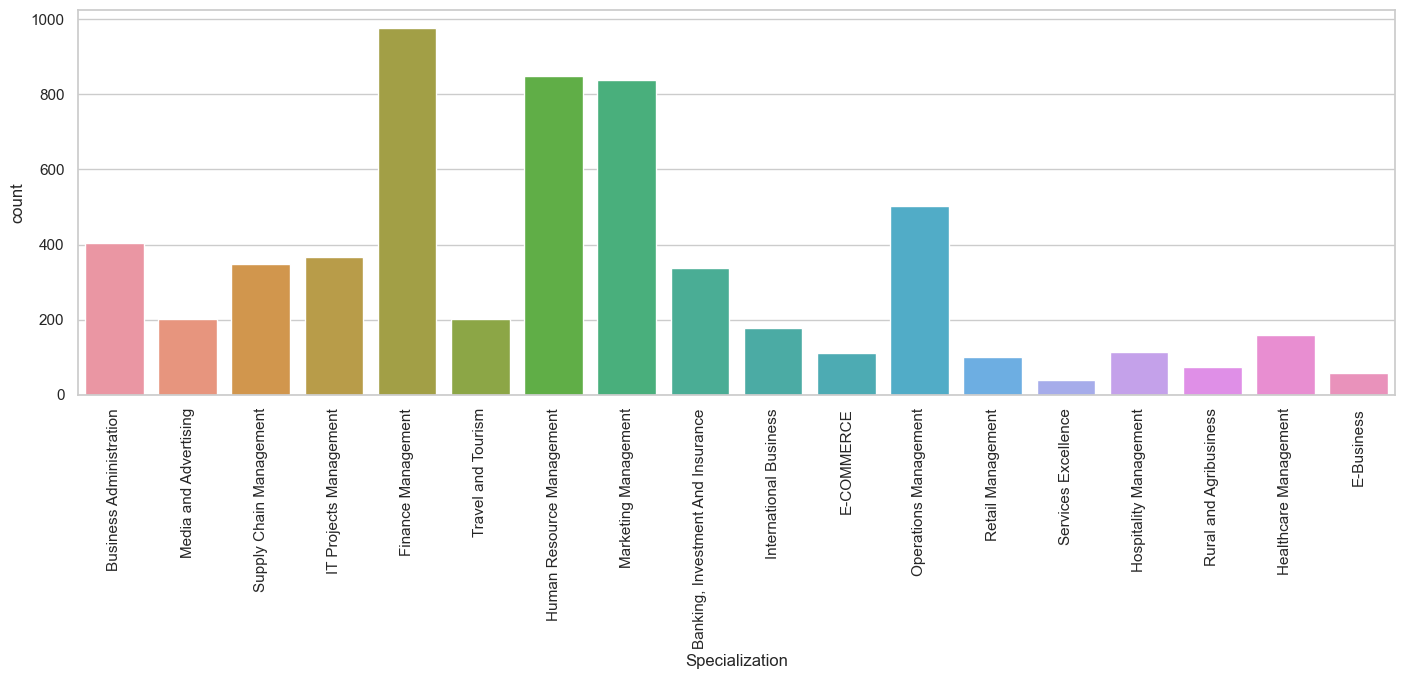

In [306]:
plt.figure(figsize=(17,5))
sns.countplot(data = df_leads, x="Specialization" )
plt.xticks(rotation=90)
plt.show()

The 37% missing values may be beacuse the lead has not filled this specific column or is not working, so we can replace the missing values as "others" column instead.

In [307]:
# Creating a separate category called 'Others' for this 
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [308]:
df_leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [309]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels have values 2 and 1 respectively.
So we choose to drop this column as well.

In [310]:
df_leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [311]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [312]:
# Checking the number of null values again
df_leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
Specialization                               0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [313]:
# Dropping the null values rows in the column 'What is your current occupation'

df_leads = df_leads[~pd.isnull(df_leads['What is your current occupation'])]
df_leads = df_leads[~pd.isnull(df_leads['TotalVisits'])]
df_leads = df_leads[~pd.isnull(df_leads['Page Views Per Visit'])]

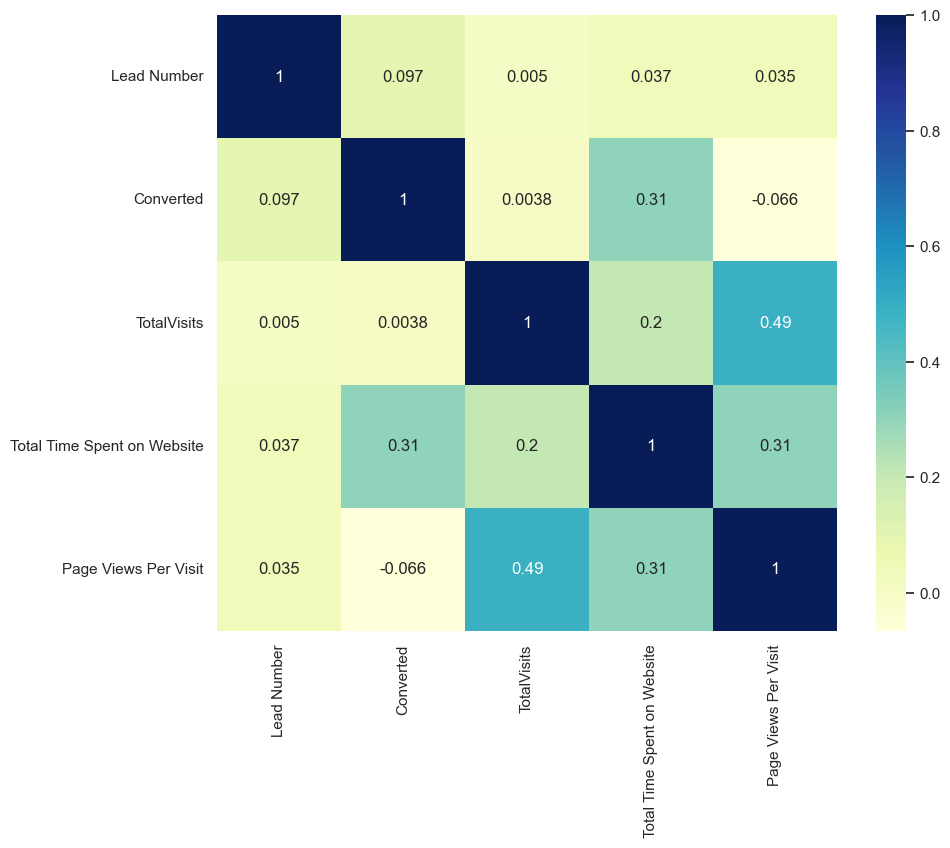

In [314]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_leads.corr(), annot=True,cmap="YlGnBu", robust=True)
plt.show()

### Exploratory Data Anaysis

### Analysing Categorical features

In [315]:
Converted = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
Converted

48.14641744548286

The lead conversion rate is 38%.

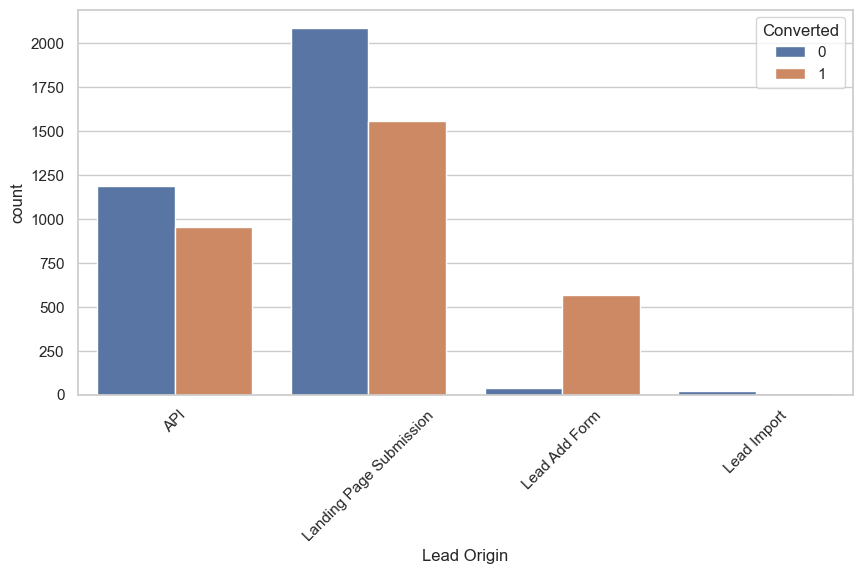

In [316]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_leads)
plt.xticks(rotation = 45)
plt.show()

#### Inference :
API and Landing Page Submission have 30-35% conversion rate and also count of the total number of lead originating from them are considerable.


Lead Add Form has more than 90% conversion rate but the countf the total number of lead originating are not very high.
Lead Import are very less in count.


To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

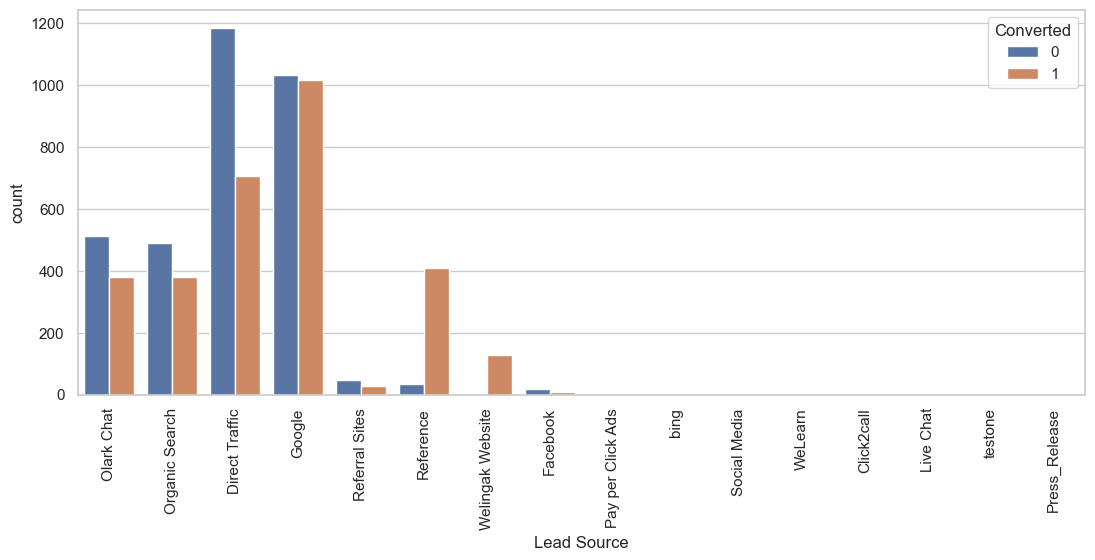

In [317]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

In [318]:
# Need to replace 'google' with 'Google'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')

In [319]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

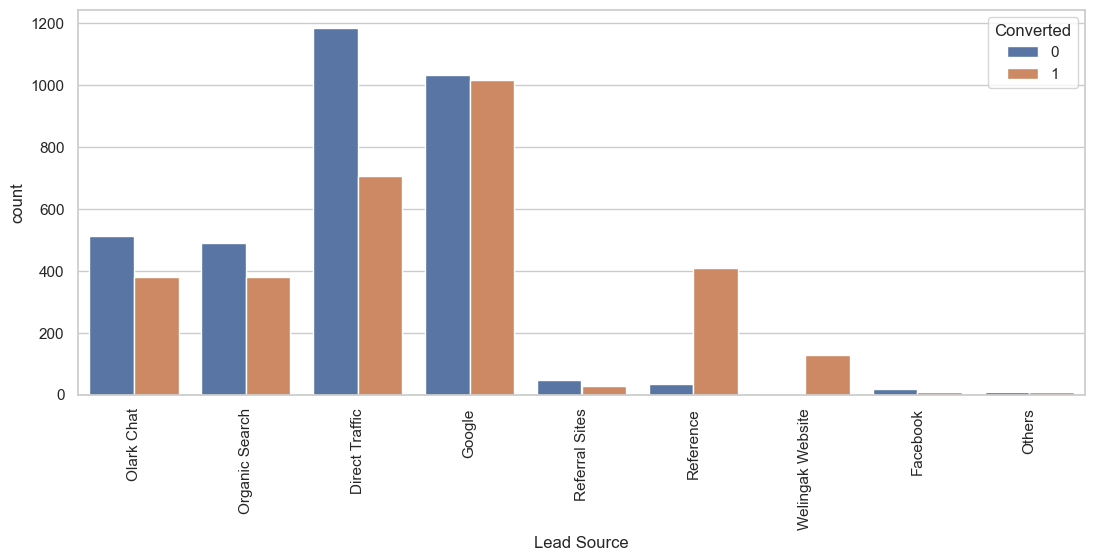

In [320]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference

Maximum converted leads are generated by Google, folloed by direct traffic.


Conversion Rate of reference and welingak website is high.


'To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.'

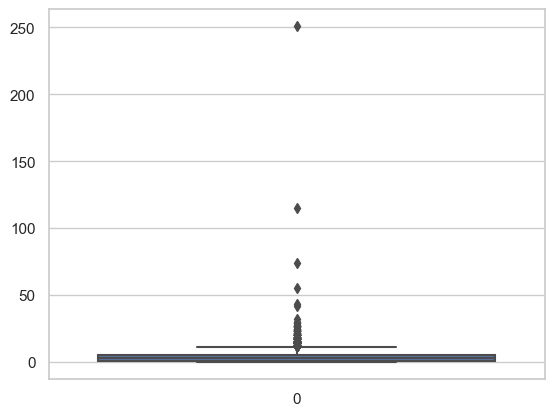

In [321]:
sns.boxplot(df_leads['TotalVisits'],orient='vert')
plt.show()

Since we can see there are a number of outliers in the data, we shall bucket the outliers for analysis.

In [322]:
percentiles = df_leads['TotalVisits'].quantile([0.05,0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

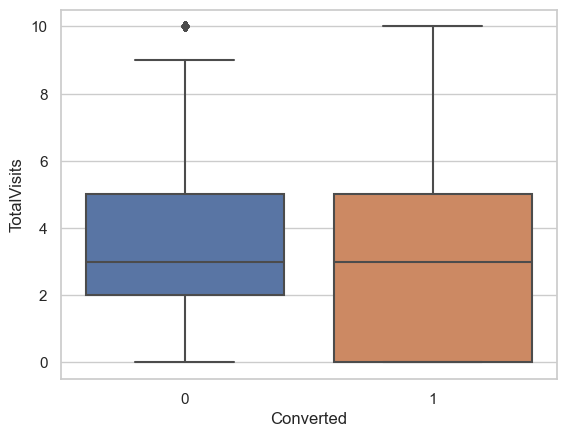

In [323]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.show()

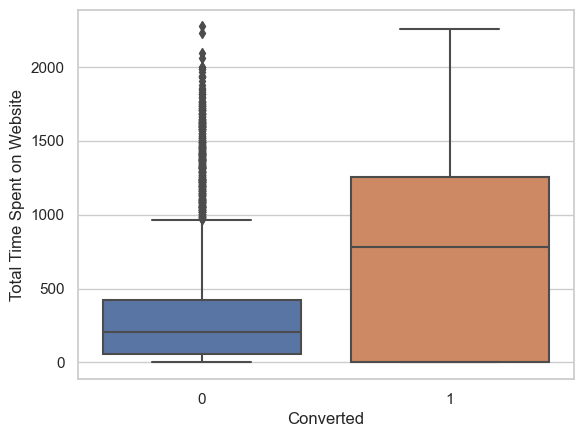

In [324]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

#### Inference:

Leads spending more time on the weblise are more likely to be converted.

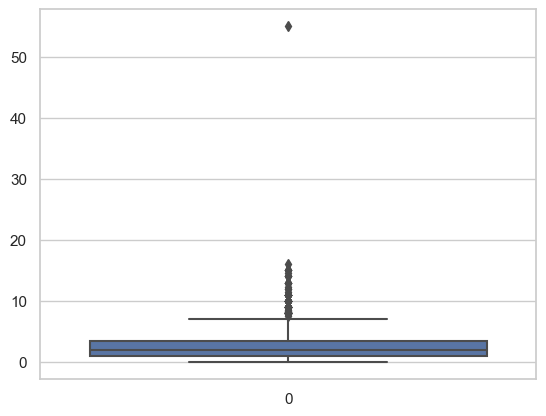

In [325]:
sns.boxplot(df_leads['Page Views Per Visit'],orient='vert')
plt.show()

In [326]:
# Since we can see there are a number of outliers in the data, we shall bucket the outliers for analysis.

percentiles = df_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

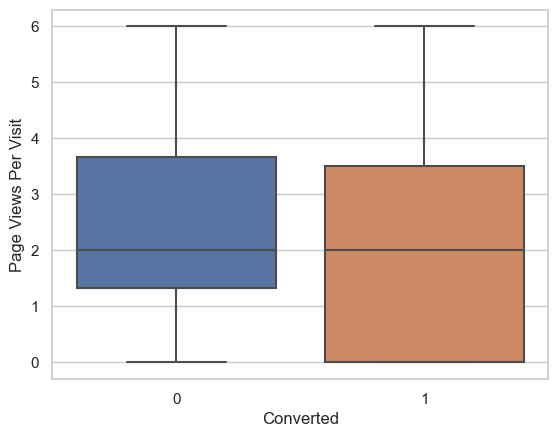

In [327]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df_leads)
plt.show()

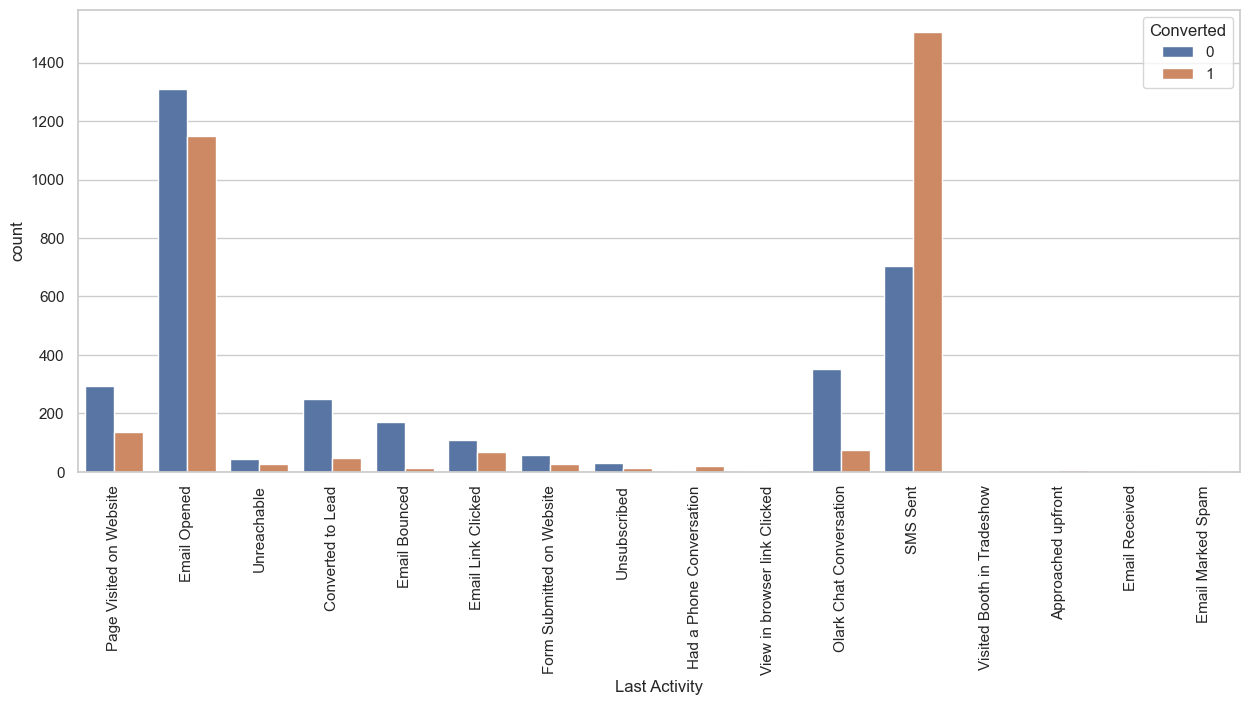

In [328]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

In [329]:
# We can club the last activities to "Other_Activity" which are having less data.
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

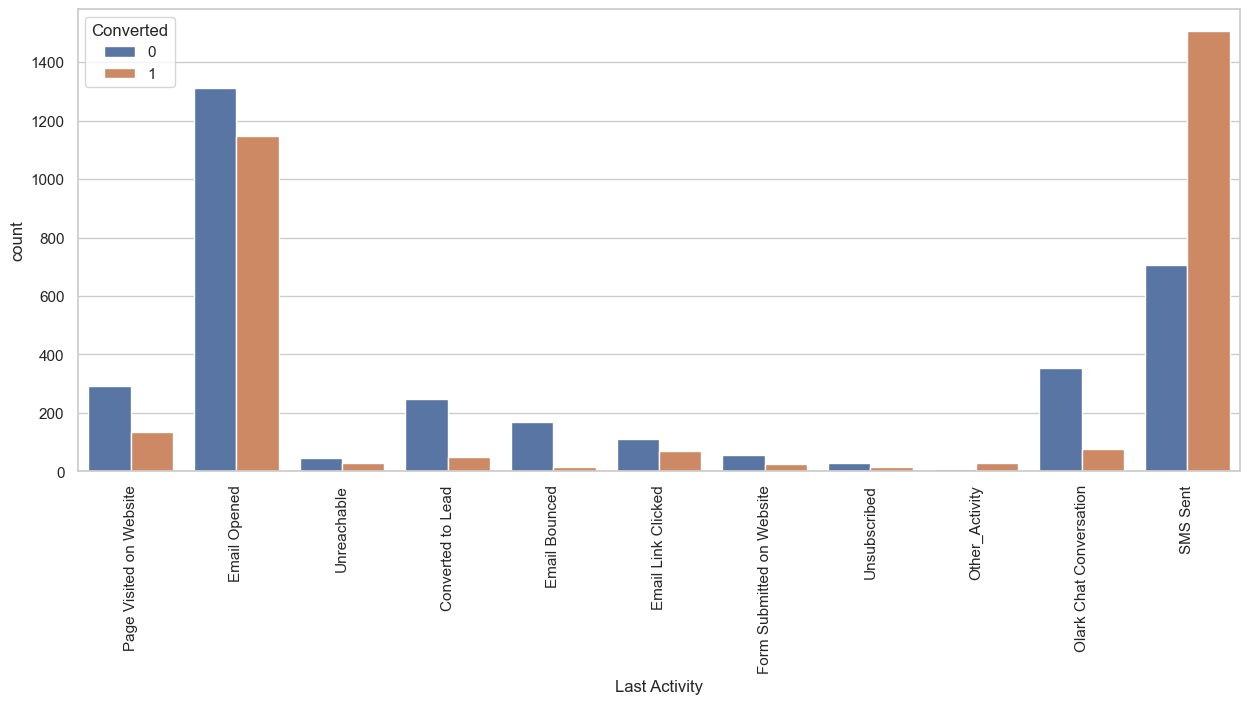

In [330]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference

Conversion rate for leads with SMS Sent is the highest.

Leads with last activity as email opened have major conversion rates.

 ### Converting some binary variables (Yes/No) to 1/0

In [331]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [332]:
vars =  ['Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df_leads[vars] = df_leads[vars].apply(binary_map)

### Dummy variable creation

In [333]:
# Checking the columns which are of type 'object'

colm = df_leads.loc[:, df_leads.dtypes == 'object']
colm.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [334]:
# Dropping the "Prospect ID" and "Lead Number" 
df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [335]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity','Do Not Email','Specialization','What is your current occupation','Last Notable Activity','A free copy of Mastering The Interview']], drop_first=True)
dummy_data.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [336]:
# Concatenating the dummy_data to the lead_data dataframe
df_leads = pd.concat([df_leads, dummy_data], axis=1)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Dropping the columns for which dummies were created

In [337]:
df_leads=df_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Do Not Email','Specialization','What is your current occupation','Last Notable Activity','A free copy of Mastering The Interview'], axis=1)
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Test-Train Split

In [338]:
# Put all the feature variables in f

f = df_leads.drop(['Converted'], 1)
f.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [339]:
a =df_leads['Converted']

a.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [340]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(f, a, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scalling

In [341]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
6630,0.2,0.084332,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8176,0.2,0.154461,0.166667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4978,0.4,0.498447,0.666667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7457,0.5,0.085664,0.833333,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4383,0.6,0.234798,1.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Model Building

As we observe that now there are a lot of variables present in the dataset. Thus the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [342]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
reg = LogisticRegression()

In [343]:
df_leads.isnull().sum()

Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
                                                     ..
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
A free copy of Mastering The Interview_Yes            0
Length: 62, dtype: int64

In [344]:
# Importing the 'RFE' to select 15 variables

rfe = RFE(reg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [345]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 33),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 46),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 32),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 13),
 ('Last Activit

In [346]:
# Putting all the columns selected by RFE in the variable 'rcol'

rcol = X_train.columns[rfe.support_]

In [347]:
# Select only the columns selected by RFE

X_train = X_train[rcol]

### Model 1

In [348]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.0
Date:                Sun, 17 Dec 2023   Deviance:                       4059.9
Time:                        19:34:49   Pearson chi2:                 4.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5773      0.626     -2.520      0.012      -2.804      -0.351
TotalVisits                                              1.5528      0.214      7.271      0.000       1.134       1.971
Total Time Spent on Website                              4.5595      0.188     24.300      0.000       4.192       4.927
Page Views Per Visit                                    -1.1999      0.222     -5.397      0.000      -1.636      -0.764
Lead Origin_Lead Add Form                                3.8963      0.262     14.845      0.000       3.382       4.411
Lead Source_Olark Chat                                   1.4485      0.145     10.004      0.000       1.165       1.732
Lead Source_Welingak Website                             2.2859      1.045      2.187      0.029       0.237       4.335
Last Activity_Email Bounced                             -1.3926      0.412     -3.382      0.001      -2.200      -0.586
Last Activity_Email Opened                               0.9972      0.106      9.391      0.000       0.789       1.205
Last Activity_Other_Activity                             1.7131      0.556      3.082      0.002       0.624       2.803
Last Activity_SMS Sent                                   1.9847      0.112     17.643      0.000       1.764       2.205
What is your current occupation_Student                 -1.4103      0.648     -2.175      0.030      -2.681      -0.140
What is your current occupation_Unemployed              -1.4033      0.614     -2.284      0.022      -2.608      -0.199
What is your current occupation_Working Professional     1.1167      0.641      1.743      0.081      -0.139       2.373
Last Notable Activity_Had a Phone Conversation          22.2680   1.28e+04      0.002      0.999    -2.5e+04     2.5e+04
Last Notable Activity_Unreachable                        3.6011      0.807      4.463      0.000       2.020       5.182
========================================================================================================================
"""

In [349]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation' as it has high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 2

In [350]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.2
Date:                Sun, 17 Dec 2023   Deviance:                       4068.4
Time:                        19:34:49   Pearson chi2:                 4.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3807
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5765      0.626     -2.520      0.012      -2.803      -0.350
TotalVisits                                              1.5567      0.213      7.308      0.000       1.139       1.974
Total Time Spent on Website                              4.5467      0.187     24.267      0.000       4.179       4.914
Page Views Per Visit                                    -1.1932      0.222     -5.382      0.000      -1.628      -0.759
Lead Origin_Lead Add Form                                3.8924      0.262     14.831      0.000       3.378       4.407
Lead Source_Olark Chat                                   1.4439      0.145      9.977      0.000       1.160       1.728
Lead Source_Welingak Website                             2.2895      1.045      2.190      0.028       0.241       4.338
Last Activity_Email Bounced                             -1.3910      0.412     -3.379      0.001      -2.198      -0.584
Last Activity_Email Opened                               0.9961      0.106      9.387      0.000       0.788       1.204
Last Activity_Other_Activity                             2.4827      0.503      4.937      0.000       1.497       3.468
Last Activity_SMS Sent                                   1.9830      0.112     17.641      0.000       1.763       2.203
What is your current occupation_Student                 -1.4090      0.648     -2.174      0.030      -2.679      -0.139
What is your current occupation_Unemployed              -1.4031      0.614     -2.285      0.022      -2.607      -0.199
What is your current occupation_Working Professional     1.1160      0.641      1.742      0.081      -0.139       2.371
Last Notable Activity_Unreachable                        3.5973      0.807      4.459      0.000       2.016       5.178
========================================================================================================================
"""

### Checking VIF

In [351]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,8.66
2,Page Views Per Visit,8.11
0,TotalVisits,5.92
7,Last Activity_Email Opened,2.64
9,Last Activity_SMS Sent,2.59
1,Total Time Spent on Website,2.39
12,What is your current occupation_Working Professional,2.14
3,Lead Origin_Lead Add Form,2.07
4,Lead Source_Olark Chat,1.92
5,Lead Source_Welingak Website,1.32


In [352]:
# Dropping the column 'What is your current occupation_Unemployed' as it has high vif
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

### Model 3

In [353]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.1
Date:                Sun, 17 Dec 2023   Deviance:                       4074.3
Time:                        19:34:49   Pearson chi2:                 4.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3799
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9728      0.142    -20.894      0.000      -3.252      -2.694
TotalVisits                                              1.5624      0.213      7.339      0.000       1.145       1.980
Total Time Spent on Website                              4.5573      0.187     24.340      0.000       4.190       4.924
Page Views Per Visit                                    -1.1914      0.222     -5.378      0.000      -1.626      -0.757
Lead Origin_Lead Add Form                                3.9130      0.262     14.916      0.000       3.399       4.427
Lead Source_Olark Chat                                   1.4484      0.145     10.017      0.000       1.165       1.732
Lead Source_Welingak Website                             2.2689      1.045      2.171      0.030       0.220       4.318
Last Activity_Email Bounced                             -1.4027      0.412     -3.408      0.001      -2.209      -0.596
Last Activity_Email Opened                               0.9918      0.106      9.361      0.000       0.784       1.199
Last Activity_Other_Activity                             2.4697      0.503      4.910      0.000       1.484       3.455
Last Activity_SMS Sent                                   1.9708      0.112     17.568      0.000       1.751       2.191
What is your current occupation_Student                 -0.0147      0.216     -0.068      0.946      -0.438       0.409
What is your current occupation_Working Professional     2.5117      0.192     13.062      0.000       2.135       2.889
Last Notable Activity_Unreachable                        3.5967      0.805      4.468      0.000       2.019       5.175
========================================================================================================================
"""

In [354]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.88
0,TotalVisits,5.71
1,Total Time Spent on Website,2.22
9,Last Activity_SMS Sent,2.22
7,Last Activity_Email Opened,2.20
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.25
11,What is your current occupation_Working Professional,1.20
6,Last Activity_Email Bounced,1.05


In [355]:
# Dropping the column 'Page Views Per Visit' as it has high vif
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

### Model 4

In [356]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4481
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.8
Date:                Sun, 17 Dec 2023   Deviance:                       4103.7
Time:                        19:34:49   Pearson chi2:                 4.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3759
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2225      0.136    -23.702      0.000      -3.489      -2.956
TotalVisits                                              0.8909      0.172      5.190      0.000       0.555       1.227
Total Time Spent on Website                              4.5508      0.187     24.364      0.000       4.185       4.917
Lead Origin_Lead Add Form                                4.2240      0.256     16.489      0.000       3.722       4.726
Lead Source_Olark Chat                                   1.7527      0.134     13.037      0.000       1.489       2.016
Lead Source_Welingak Website                             2.2586      1.043      2.165      0.030       0.214       4.303
Last Activity_Email Bounced                             -1.3556      0.408     -3.320      0.001      -2.156      -0.555
Last Activity_Email Opened                               0.9236      0.104      8.847      0.000       0.719       1.128
Last Activity_Other_Activity                             2.3884      0.498      4.796      0.000       1.412       3.364
Last Activity_SMS Sent                                   1.8630      0.109     17.059      0.000       1.649       2.077
What is your current occupation_Student                 -0.0017      0.217     -0.008      0.994      -0.427       0.423
What is your current occupation_Working Professional     2.5009      0.191     13.091      0.000       2.126       2.875
Last Notable Activity_Unreachable                        3.5168      0.805      4.370      0.000       1.940       5.094
========================================================================================================================
"""

In [357]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.51
1,Total Time Spent on Website,2.19
6,Last Activity_Email Opened,1.97
8,Last Activity_SMS Sent,1.94
2,Lead Origin_Lead Add Form,1.64
4,Lead Source_Welingak Website,1.32
3,Lead Source_Olark Chat,1.20
10,What is your current occupation_Working Professional,1.20
9,What is your current occupation_Student,1.04
5,Last Activity_Email Bounced,1.03


In [358]:
# Dropping the column 'What is your current occupation_Student' as it has high p-value
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

### Model 5

In [359]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4482
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.8
Date:                Sun, 17 Dec 2023   Deviance:                       4103.7
Time:                        19:34:49   Pearson chi2:                 4.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3759
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2226      0.136    -23.749      0.000      -3.489      -2.957
TotalVisits                                              0.8910      0.172      5.191      0.000       0.555       1.227
Total Time Spent on Website                              4.5508      0.187     24.365      0.000       4.185       4.917
Lead Origin_Lead Add Form                                4.2239      0.256     16.495      0.000       3.722       4.726
Lead Source_Olark Chat                                   1.7526      0.134     13.043      0.000       1.489       2.016
Lead Source_Welingak Website                             2.2587      1.043      2.165      0.030       0.214       4.303
Last Activity_Email Bounced                             -1.3556      0.408     -3.321      0.001      -2.156      -0.555
Last Activity_Email Opened                               0.9236      0.104      8.847      0.000       0.719       1.128
Last Activity_Other_Activity                             2.3884      0.498      4.797      0.000       1.413       3.364
Last Activity_SMS Sent                                   1.8630      0.109     17.072      0.000       1.649       2.077
What is your current occupation_Working Professional     2.5010      0.191     13.101      0.000       2.127       2.875
Last Notable Activity_Unreachable                        3.5168      0.805      4.370      0.000       1.940       5.094
========================================================================================================================
"""

In [360]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.51
1,Total Time Spent on Website,2.19
6,Last Activity_Email Opened,1.97
8,Last Activity_SMS Sent,1.94
2,Lead Origin_Lead Add Form,1.64
4,Lead Source_Welingak Website,1.32
3,Lead Source_Olark Chat,1.20
9,What is your current occupation_Working Professional,1.19
5,Last Activity_Email Bounced,1.03
7,Last Activity_Other_Activity,1.02


## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [361]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6630    0.149687
8176    0.087744
4978    0.779907
7457    0.187902
4383    0.165274
4152    0.597012
406     0.704826
8992    0.069150
1504    0.357246
66      0.772190
dtype: float64

In [362]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14968748, 0.08774444, 0.77990737, 0.18790173, 0.16527372,
       0.59701173, 0.70482619, 0.06915026, 0.35724561, 0.77219025])

In [363]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.149687
1,0,0.087744
2,0,0.779907
3,0,0.187902
4,0,0.165274


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [364]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.149687,0
1,0,0.087744,0
2,0,0.779907,1
3,0,0.187902,0
4,0,0.165274,0


### Creating the Confusion matrix

In [365]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1961  380]
 [ 539 1614]]


In [366]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7955051179350244


In [367]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [368]:
# Calculating the 'sensitivity'

print('Senstivity :', TP/(TP+FN))

Senstivity : 0.7496516488620529


In [369]:
# Calculating the 'specificity'
print('Specificity : ',TN /(TN+FP))

Specificity :  0.8376762067492525


In [370]:
 # Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/(TN+FP))

False Positive Rate : 0.16232379325074756


## Finding the optimal cut-off 
We found out that our specificity was good (~83%) but our sensitivity was only 74%. Hence, this is needed to be taken care of.
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we will need to optimise the threshold.So lets carry forward with a ROC curve to check the AUC

In [371]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [372]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

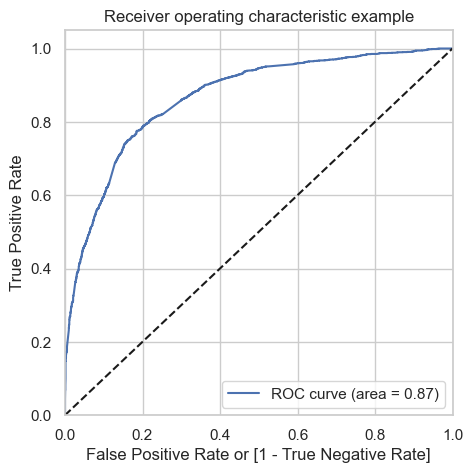

In [373]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [374]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149687,0,1,1,0,0,0,0,0,0,0,0
1,0,0.087744,0,1,0,0,0,0,0,0,0,0,0
2,0,0.779907,1,1,1,1,1,1,1,1,1,0,0
3,0,0.187902,0,1,1,0,0,0,0,0,0,0,0
4,0,0.165274,0,1,1,0,0,0,0,0,0,0,0


In [375]:
# Let's see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.582109  0.984673  0.211875
0.2   0.2  0.713841  0.946122  0.500214
0.3   0.3  0.764575  0.900604  0.639470
0.4   0.4  0.790832  0.807710  0.775310
0.5   0.5  0.795505  0.749652  0.837676
0.6   0.6  0.764130  0.631212  0.886373
0.7   0.7  0.744548  0.555039  0.918838
0.8   0.8  0.713618  0.451928  0.954293
0.9   0.9  0.649088  0.283790  0.985049


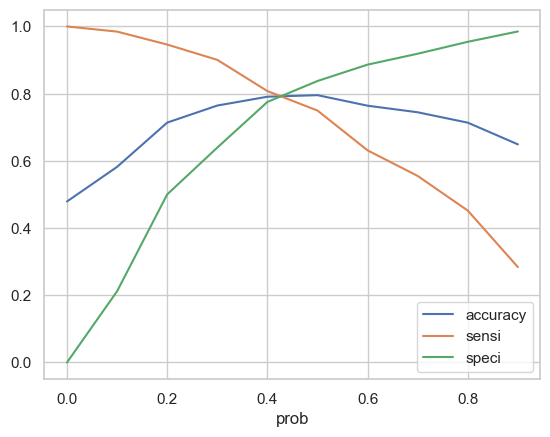

In [376]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [377]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149687,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.087744,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.779907,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.187902,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165274,0,1,1,0,0,0,0,0,0,0,0,0


In [378]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.792167334223409

In [379]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1848,  493],
       [ 441, 1712]], dtype=int64)

In [380]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [381]:
# Calculating the 'Sensitivity'

print('Sensitivity: ',TP/(TP+FN))

Sensitivity:  0.7951695308871343


In [382]:
# Calculating the 'Specificity'

print('Specificity: ',TN/(TN+FP))

Specificity:  0.7894062366510038


In [383]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision : 0.7764172335600907
Recall : 0.7951695308871343


## Making Predictions on the Test Set

In [384]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [385]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[rcol]
X_test.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4051,0.4,0.676431,0.333333,0,0,0,0,1,0,0,0,1,0,0,0
1696,0.3,0.356414,0.500000,0,0,0,0,0,0,0,0,1,0,0,0
1325,0.9,0.536174,1.000000,0,0,0,0,1,0,0,0,1,0,0,0
7991,0.3,0.764314,0.250000,0,0,0,0,0,0,1,0,1,0,0,0
8177,0.3,0.456724,0.500000,0,0,0,0,0,0,1,0,1,0,0,0


In [386]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [387]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4051,1.0,0.4,0.676431,0.333333,0,0,0,0,1,0,0,0,1,0,0,0
1696,1.0,0.3,0.356414,0.500000,0,0,0,0,0,0,0,0,1,0,0,0
1325,1.0,0.9,0.536174,1.000000,0,0,0,0,1,0,0,0,1,0,0,0
7991,1.0,0.3,0.764314,0.250000,0,0,0,0,0,0,1,0,1,0,0,0
8177,1.0,0.3,0.456724,0.500000,0,0,0,0,0,0,1,0,1,0,0,0


In [388]:
# Dropping the required columns from X_test as well

X_test.drop(['Last Notable Activity_Had a Phone Conversation', 'What is your current occupation_Unemployed', 
             'Page Views Per Visit', 
                     'What is your current occupation_Student'], 1, 
                                inplace = True)

In [389]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [390]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [391]:
y_pred_1.head()

,0
4051,0.756886
1696,0.208607
1325,0.719681
7991,0.915749
8177,0.728329


In [392]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


y_pred_final.head()

,Converted,0
0,0,0.756886
1,1,0.208607
2,0,0.719681
3,0,0.915749
4,1,0.728329


In [393]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.756886
1,1,0.208607
2,0,0.719681
3,0,0.915749
4,1,0.728329


In [394]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [395]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7829698857736241

In [396]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[767, 221],
       [197, 741]], dtype=int64)

In [397]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [398]:
# Calculating the 'sensitivity'
print('Sensitivity: ',TP / float(TP+FN))

Sensitivity:  0.7899786780383795


In [399]:
# Calculating the 'specificity'
print('Specificity: ',TN / float(TN+FP))

Specificity:  0.7763157894736842


### Precision-Recall View

In [400]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1961,  380],
       [ 539, 1614]], dtype=int64)

In [401]:
print('Precision:',confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision: 0.8094282848545636


In [402]:
print('Recall:',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall: 0.7496516488620529


In [403]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Precison-Recall Tradeoff

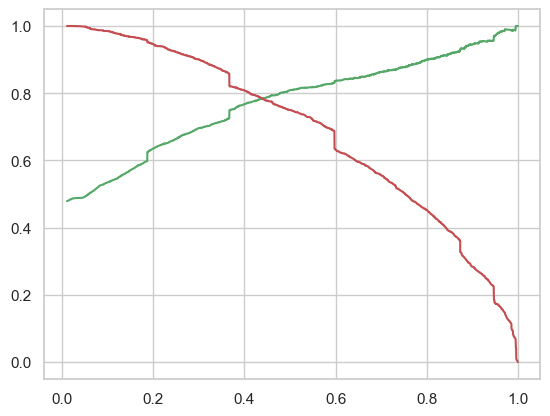

In [404]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [405]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149687,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.087744,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.779907,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.187902,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165274,0,1,1,0,0,0,0,0,0,0,0,0


In [406]:
# checking the `accuracy` again

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7928348909657321

In [407]:
#creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1877,  464],
       [ 467, 1686]], dtype=int64)

In [408]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [409]:
print('precison: ', TP/(TP+FP))

precison:  0.7841860465116279


In [410]:
print('Recall: ',TP/(TP+FN))

Recall:  0.7830933581049698
